In [33]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [78]:
heart = pd.read_csv("//isslx110.essex.ac.uk//vv18859//pc//desktop//CE888-DS & DM//fair//heart.csv")

In [35]:
print("The heart dataset has {0} rows and {1} columns".format(ht_dt.shape[0], ht_dt.shape[1]))

The heart dataset has 303 rows and 14 columns


In [79]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


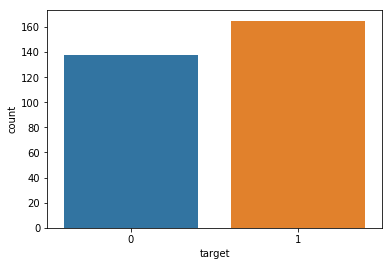

In [37]:
import seaborn as sns
sns.countplot(ht_dt['target'],label="Count")

In [38]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [80]:
missing_values_table(heart)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [40]:
#import seaborn as sns
#sns.heatmap(ht_dt.isnull(), cbar=False)

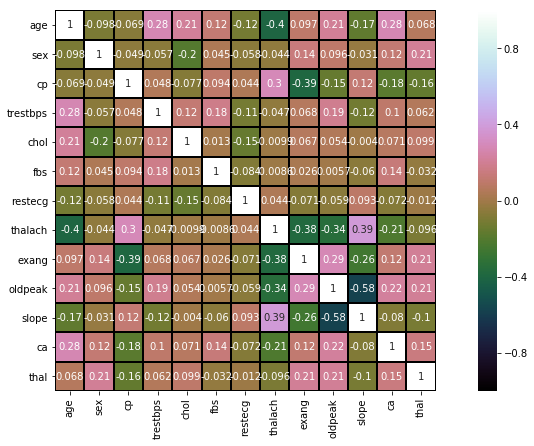

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
heart_ft = heart.drop('target', axis=1)
fig=plt.gcf()
fig.set_size_inches(15,7)
fig=sns.heatmap(heart_ft.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',
                square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [82]:
from scipy.stats import spearmanr
import numpy as np
labels = []
values = []
for col in ht_dt.columns:
    if col not in ["target"]:
        labels.append(col)
        values.append(spearmanr(heart[col].values, heart["target"].values)[0])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
 


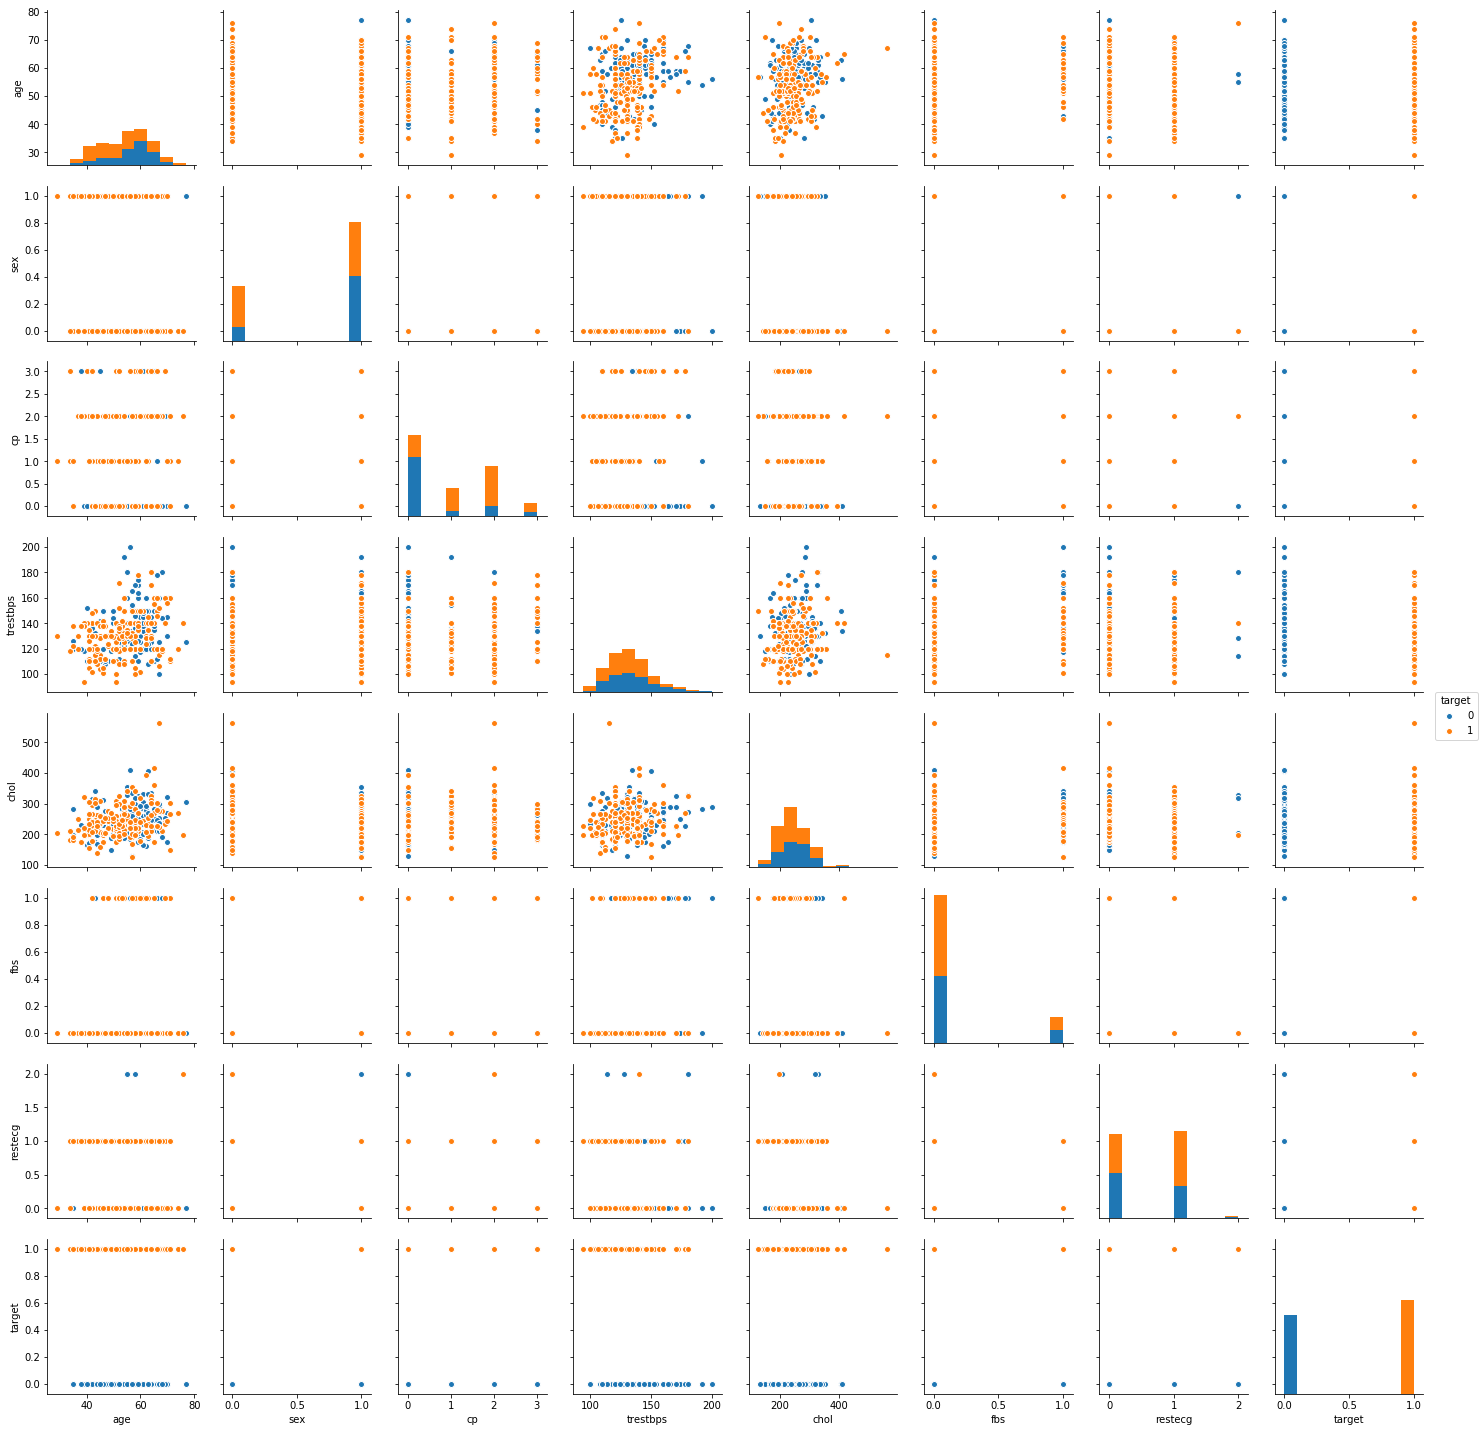

In [83]:
set1 = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'target']
set1_dt = heart[set1]
sns.pairplot(set1_dt, hue="target")

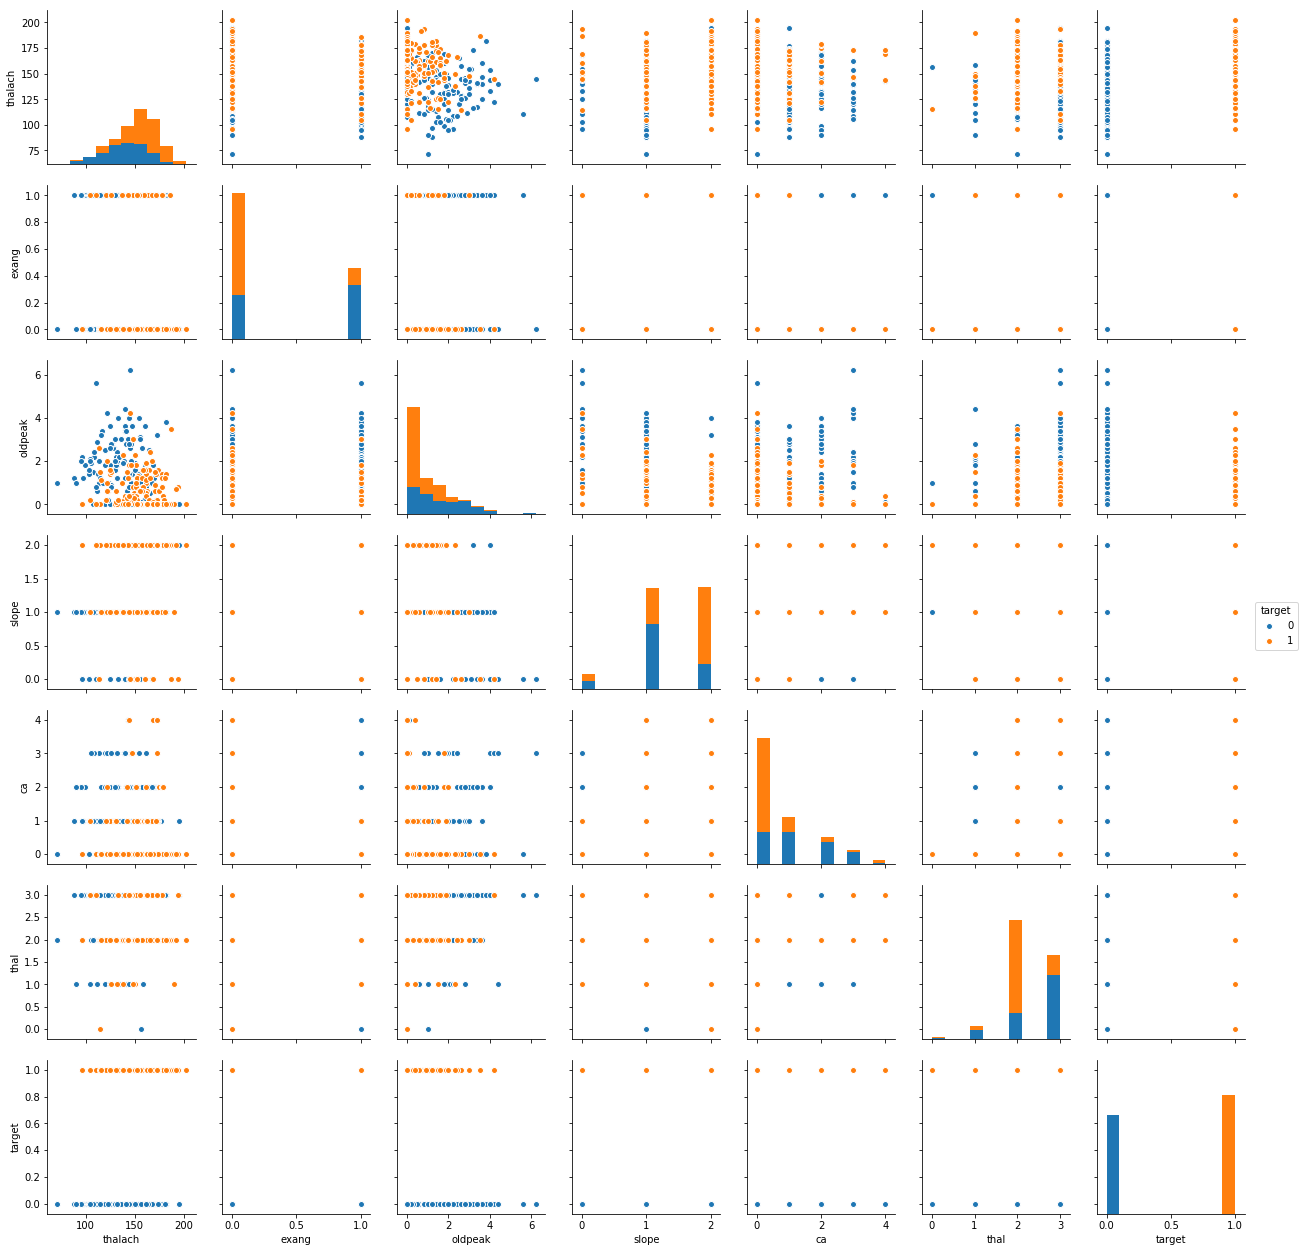

In [84]:
set2 = ['thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
set2_dt = heart[set2]
sns.pairplot(set2_dt, hue="target")

In [86]:
age_uniq = heart.age.nunique()
print("Number of unique values in age is {}".format(age_uniq))

Number of unique values in age is 41


In [87]:
trestbps_uniq = heart.trestbps.nunique()
print("Number of unique values in trestbps is {}".format(trestbps_uniq))

Number of unique values in trestbps is 49


In [88]:
thalach_uniq = heart.thalach.nunique()
print("Number of unique values in thalach is {}".format(thalach_uniq))

Number of unique values in thalach is 91


In [89]:
chol_uniq = heart.chol.nunique()
print("Number of unique values in chol is {}".format(chol_uniq))

Number of unique values in chol is 152


In [90]:
oldpeak_uniq = heart.oldpeak.nunique()
print("Number of unique values in oldpeak is {}".format(oldpeak_uniq))

Number of unique values in oldpeak is 40


In [91]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [92]:
y=heart.target
x=heart.drop(["target"],axis=1)





In [94]:
#Train and test split the data by 30% and 70%
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
scores_accuracy=[]


In [54]:
# Random clasifier using to predict the probability
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,random_state=1) # n_estimators= number of trees
rf.fit(x_train,y_train)

rf_score = rf.score(x_test,y_test)  
scores_accuracy.append(["RF",rf_score])
prediction_of_probability = rf.predict_proba(x)
rf_score = rf.score(x_test,y_test)
y_pred=rf.predict(x_test)
scores_accuracy.append(["RF",rf_score])
print("random forest result: ", rf.score(x_test,y_test))

random forest result:  0.8131868131868132


In [55]:
#binning the preobability
bin_classes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [56]:
bins = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [57]:
#converting into the multi class
x['prob_0'] = pd.cut(prediction_of_probability[:,0],bins,labels=bin_classes, include_lowest=True)

In [95]:
#converting into the multi class
x['prob_1'] = pd.cut(prediction_of_probability[:,1],bins,labels=bin_classes, include_lowest=True)

In [59]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prob_0,prob_1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0.2,0.9
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0.2,0.9
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0.1,1.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0.1,1.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0.2,0.9


In [60]:
#Dropping the one probability column which gives the same result
x.drop(columns="prob_0",axis=1).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prob_1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0.9
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0.9
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0.9


In [61]:
# Splitting into the new dataset , train and test for model fitting
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=0)

In [62]:
#Decision tree classifier to find the accuracy on new dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
rlf = DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=0).fit(X_train1,y_train1)
y_pred1 =rlf.predict(X_test1)
from sklearn import metrics
# classification rate
T=metrics.accuracy_score(y_test1, y_pred1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9344262295081968


In [63]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test1, y_pred1)
prec = precision_score(y_test1, y_pred1)
rec = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)
model_results = pd.DataFrame([['Random forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random forest,0.934426,0.941176,0.941176,0.941176


In [96]:
#Evaluating the model after transferring the knowledge
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))  

Mean Absolute Error: 0.06557377049180328
Mean Squared Error: 0.06557377049180328
Root Mean Squared Error: 0.25607375986579195


In [66]:
#Performing other classification algorithms on the original dataset
# Logistic regression classication
# LR with sklearn

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)

lr_score = lr.score(x_test,y_test)
scores_accuracy.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(x_test,y_test)))

test accuracy 0.8131868131868132


In [67]:
# KNN  classification on the original dataset
# Knn with sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

knn_score = knn.score(x_test,y_test)
scores_accuracy.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(x_test,y_test)))

 9 nn score: 0.6593406593406593 


In [68]:
# SVM Classification on the original dataset
# SVM with sklearn

from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

svm_score = svm.score(x_test,y_test)
scores_accuracy.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(x_test,y_test))

accuracy of svm algo:  0.5604395604395604


In [97]:
#NV on the original dataset
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_score = nb.score(x_test,y_test)
scores_accuracy.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

print accuracy of naive bayes algo:  0.8351648351648352


In [98]:
# Decision Tree Classification on the original dataset
# Decision Tree With Sklearn
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred4=dt.predict(x_test)
dt_score = dt.score(x_test,y_test)
scores_accuracy.append(["DT",dt_score])

print("print accuracy of decision tree algo: ",dt.score(x_test,y_test))

print accuracy of decision tree algo:  0.7362637362637363


In [99]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
model_results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.736264,0.795455,0.7,0.744681


In [100]:
#Applying the ml algorithms on the new dataset after transfrring the knowledge
# Logistic regression classication
# LR with sklearn
scores_accuracy1=[]
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train1,y_train1)

lr_score1 = lr.score(X_test1,y_test1)
scores_accuracy1.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(X_test1,y_test1)))

test accuracy 0.9672131147540983


In [101]:
#KNN on the new data set after transferred the knowledge
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(X_train1,y_train1)
prediction = knn.predict(X_test1)

knn_score1 = knn.score(X_test1,y_test1)
scores_accuracy1.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(X_test1,y_test1)))

 9 nn score: 0.6721311475409836 


In [102]:
#SVM on the new dataset after transferred the knowledge
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(X_train1,y_train1)

svm_score1 = svm.score(X_test1,y_test1)
scores_accuracy1.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(X_test1,y_test1))

accuracy of svm algo:  0.5737704918032787


In [103]:
#NB on the new dataset after transferred the knowledge
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train1,y_train1)
nb_score1 = nb.score(X_test1,y_test1)
scores_accuracy1.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(X_test1,y_test1))

print accuracy of naive bayes algo:  0.9672131147540983
